In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import glob
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.cm as cm
import matplotlib.ticker as ticker

Welcome to JupyROOT 6.26/04


In [2]:
def cal_eff_purity_ownMC(file_name,file_list, tree, base_filter, N_gen):
    
    variables = ['Dp_isSignal','Dp_M','__experiment__', '__run__', '__event__']
    
    N_rec = 0
    N_rec_true = 0

    # Initialize an empty dataframe to store concatenated results
    concatenated_df = pd.DataFrame()

    for file in file_list:
        recon_df = get_pd(file, tree, base_filter, variables)
        N_rec += len(recon_df)
        extracted_df = recon_df[["__experiment__", "__run__", "__event__"]].drop_duplicates()

        # Concatenate the extracted dataframe with the concatenated_df
        concatenated_df = pd.concat([concatenated_df, extracted_df], ignore_index=True)

    multiplicity = len(concatenated_df) / N_rec

    eff = N_rec/N_gen

    # Initialize an empty dataframe to store concatenated results
    concatenated_df2 = pd.DataFrame()

    N_rec2 = 0
    N_rec_true2 = 0
    
    for file in file_list:
        recon_df2 = get_pd(file, tree, base_filter, variables)
        N_rec2 += len(recon_df2)
        extracted_df2 = recon_df2.query('Dp_isSignal==1')
        N_rec_true2 += len(extracted_df2)

        # Concatenate the extracted dataframe with the concatenated_df
        concatenated_df2 = pd.concat([concatenated_df2, extracted_df2], ignore_index=True)
    
    purity = N_rec_true2/N_rec2
    
    print(f"eff={eff:.5f}, purity={purity:.5f}, multiplicity={multiplicity:.5f}")
    
    return (eff, purity, multiplicity)

In [3]:
def calculate_sig_eff_err(eff, N_gen):

    error = math.sqrt(eff * (1 - eff) / N_gen)
    return error

# D+ -> eta pi+

In [20]:
# Numer of files should be 22*2 = 44

In [41]:
file = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15rd_sigMC/Dptoetapip_gg/241114_loose_v2/etapip_gg/*BCS.root'
base_filter=' Dp_M>1.76 && Dp_M<1.96'
base_filter=' Dp_M>1.78 && Dp_M<1.94'

tree = 'etapip_gg'
root_files = glob.glob(file)

file_cc = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15rd_sigMC/Dptoetapip_gg_cc/241114_loose_v2/etapip_gg/*BCS.root'
root_files += glob.glob(file_cc)

print(len(root_files))

df = get_pd(file=file, tree=tree,base_filter='Dp_M>0',variables=['Dp_M','Dp_isSignal'])
df_cc = get_pd(file=file_cc, tree=tree,base_filter='Dp_M>0',variables=['Dp_M','Dp_isSignal'])

df_all = pd.concat([df, df_cc], ignore_index=True)
df_all_true = df_all.query('Dp_isSignal==1')

std_dev_Dp_M = df_all_true['Dp_M'].std()
print("Standard deviation of column 'Dp_M':", std_dev_Dp_M)

# x_start = 1.8697 - 2.5*std_dev_Dp_M
# x_end = 1.8697 + 2.5*std_dev_Dp_M

x_start = 1.8697 - 4.2*std_dev_Dp_M
x_end = 1.8697 + 3.8*std_dev_Dp_M

print(x_start)
print(x_end)

44
Standard deviation of column 'Dp_M': 0.01900965896089381
1.7898594323642458
1.9419367040513964


266174


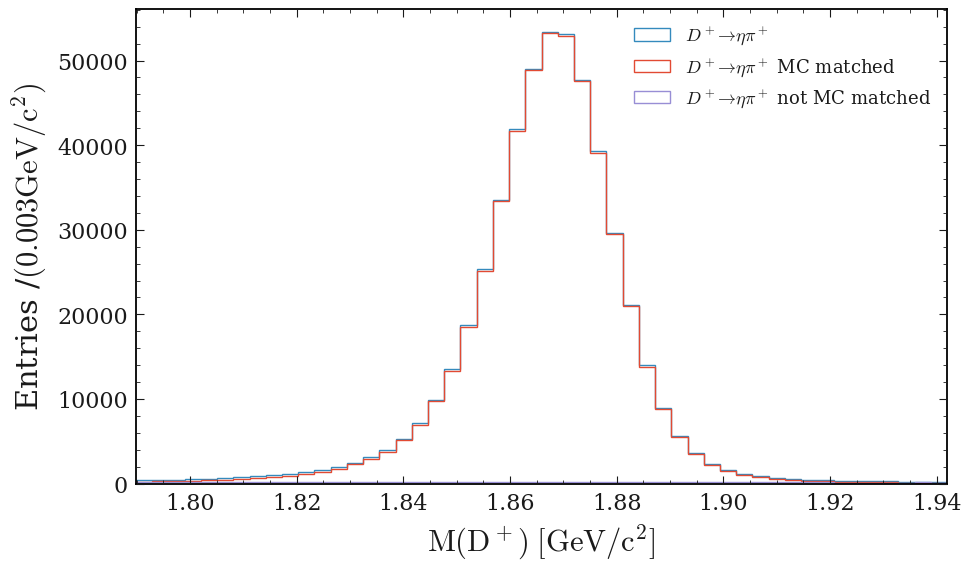

In [42]:
variables = ['Dp_M','Dp_isSignal','Dp_chiProb','Dp_mcErrors']

# df_all = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df_all.query('Dp_isSignal==1')
df3 = df_all.query('Dp_isSignal!=1')

fig = plt.figure(figsize=(10, 6))

ax = fig.subplots()
xrange = (x_start,x_end,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df_all)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df_all["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=13)
# ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg/MC15ri_tight_v1_DpM_BCS_SR.png"
# plt.savefig(file1_name)
print(len(df))

In [14]:
file = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15rd_sigMC/Dptoetapip_gg/241114_loose_v2/etapip_gg/*BCS.root'
base_filter=' Dp_M>1.76 && Dp_M<1.96'
base_filter=' Dp_M>1.78 && Dp_M<1.94'

tree = 'etapip_gg'
root_files = glob.glob(file)

file_cc = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15rd_sigMC/Dptoetapip_gg_cc/241114_loose_v2/etapip_gg/*BCS.root'
root_files += glob.glob(file_cc)

print(len(root_files))

D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 6e+6)

44
eff=0.08556, purity=0.98156, multiplicity=1.00000


In [6]:
calculate_sig_eff_err(0.08611, 6e+6)

0.00011452442818019219

In [15]:
calculate_sig_eff_err(0.08556, 6e+6)

0.0001141924445836939

In [7]:
# Numer of files should be 23*2 = 46

In [55]:
file = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15rd_sigMC/Dptoetapip_pipipi/241114_loose_v2/etapip_pipipi/*BCS.root'
base_filter=' Dp_M>1.8 && Dp_M<1.93'

tree = 'etapip_pipipi'
root_files = glob.glob(file)

file_cc = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15rd_sigMC/Dptoetapip_pipipi_cc/241114_loose_v2/etapip_pipipi/*BCS.root'
root_files += glob.glob(file_cc)


print(len(root_files))

df = get_pd(file=file, tree=tree,base_filter='Dp_M>0',variables=['Dp_M','Dp_isSignal'])
df_cc = get_pd(file=file_cc, tree=tree,base_filter='Dp_M>0',variables=['Dp_M','Dp_isSignal'])

# df_all = pd.concat([df, df_cc], ignore_index=True)
df_all = pd.concat([df, df_cc], ignore_index=True)
df_all_true = df_all.query('Dp_isSignal==1')

std_dev_Dp_M = df_all_true['Dp_M'].std()
print("Standard deviation of column 'Dp_M':", std_dev_Dp_M)

# x_start = 1.8697 - 2.5*std_dev_Dp_M
# x_end = 1.8697 + 2.5*std_dev_Dp_M

x_start = 1.8697 - 3.2*std_dev_Dp_M
x_end = 1.8697 + 2.8*std_dev_Dp_M

x_start = 1.8697 - 4.2*std_dev_Dp_M
x_end = 1.8697 + 3.8*std_dev_Dp_M

print(x_start)
print(x_end)

46
Standard deviation of column 'Dp_M': 0.015197833385358014
1.8058690997814963
1.9274517668643603


192285


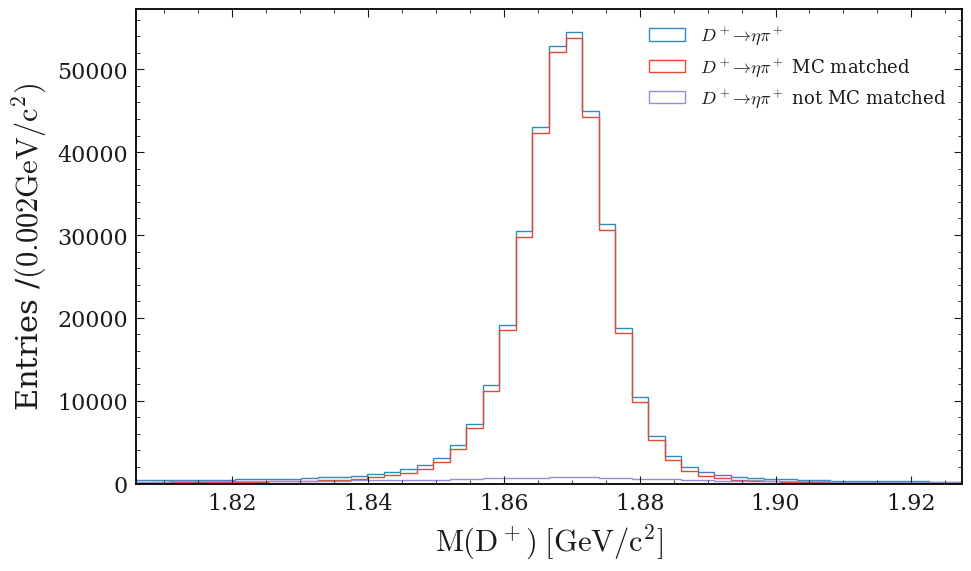

In [56]:
variables = ['Dp_M','Dp_isSignal','Dp_chiProb','Dp_mcErrors']

# df_all = get_pd(file=file, tree=tree,base_filter=base_filter,variables=variables)
df2 = df_all.query('Dp_isSignal==1')
df3 = df_all.query('Dp_isSignal!=1')

fig = plt.figure(figsize=(10, 6))

ax = fig.subplots()
xrange = (x_start,x_end,51)

xm = np.linspace(*xrange)

# df = pd_df_test
# df2 = pd_df_test2

N_df = len(df_all)
N_df2 = len(df2)
N_df3 = len(df3)

plt.hist(df_all["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$');
plt.hist(df2["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ MC matched');
plt.hist(df3["Dp_M"],bins=xm,histtype='step',label=r'$D^+ \to \eta \pi^+$ not MC matched');

plt.legend(loc="upper right",fontsize=13)
# ax.set_title(r'MC15ri 1M' )

n, xe = np.histogram(df["Dp_M"], bins=50, range=(xrange[0],xrange[1]))

plt.xlabel("$\mathrm{M(D^+)} \; [\mathrm{GeV/c^2}]$")
width = xe[1]-xe[0]
plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');

plt.xlim(xrange[0],xrange[1])
plt.tight_layout()
# file1_name="/media/jykim/T7/saved_plots/DRAW/etapip/MC15ri_sig/gg/MC15ri_tight_v1_DpM_BCS_SR.png"
# plt.savefig(file1_name)
print(len(df))

In [8]:
file = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15rd_sigMC/Dptoetapip_pipipi/241114_loose_v2/etapip_pipipi/*BCS.root'
base_filter=' Dp_M>1.8 && Dp_M<1.93'

tree = 'etapip_pipipi'
root_files = glob.glob(file)

file_cc = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15rd_sigMC/Dptoetapip_pipipi_cc/241114_loose_v2/etapip_pipipi/*BCS.root'
root_files += glob.glob(file_cc)

print(len(root_files))

D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 6e+6)

46
eff=0.06125, purity=0.94254, multiplicity=1.00000


In [9]:
calculate_sig_eff_err(0.06125, 6e+6)

9.789317093989072e-05

# Ds+ -> eta pi+

In [2]:
file = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15rd_sigMC/Dsptoetapip_gg/241114_loose_v2/etapip_gg/*BCS.root'
base_filter=' Dp_M>1.88 && Dp_M<2.04'

tree = 'etapip_gg'
root_files = glob.glob(file)

file_cc = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15rd_sigMC/Dsptoetapip_gg_cc/241114_loose_v2/etapip_gg/*BCS.root'
root_files += glob.glob(file_cc)

print(len(root_files))

D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 6e+6)

44


NameError: name 'cal_eff_purity_ownMC' is not defined

In [11]:
calculate_sig_eff_err(0.07311, 6e+6)

0.00010627396035718251

In [12]:
file = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15rd_sigMC/Dsptoetapip_pipipi/241114_loose_v2/etapip_pipipi/*BCS.root'
base_filter=' Dp_M>1.92 && Dp_M<2.01'

tree = 'etapip_pipipi'
root_files = glob.glob(file)

file_cc = '/share/storage/jykim/storage_ghi/Ntuples_ghi_2/MC15rd_sigMC/Dsptoetapip_pipipi_cc/241114_loose_v2/etapip_pipipi/*BCS.root'
root_files += glob.glob(file_cc)

print(len(root_files))

D0eff,D0purity,D0multiplicity = cal_eff_purity_ownMC(file,root_files, tree, base_filter, 6e+6)

46
eff=0.05331, purity=0.00000, multiplicity=1.00000


In [13]:
calculate_sig_eff_err(0.05331, 6e+6)

9.171336134936938e-05